# Importing libs

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as tickers

from functions import *

%matplotlib inline

# Stress x Strain - Eurocode

| <img width=500 src='Equations.jpg'> | <img width=500 src='Graph.jpg'> |

In [10]:
#Material definitions
fpi=525.18e6
fyi=708.47e6
Eai = 525.18e6/0.0025


emax = 0.1 #Max strain to calculate
points = 500 #number of points to calculate
strains = np.linspace(0,emax,points,endpoint=True)

#Alternativley create a list with desired strains e.g:
#strains = [0,0.0025,0.0226,0.0419,0.0609,0.0798,0.0981,0.1044]

#Temperatures to evaluate
#20 to 1200
temperatures = [100,200,300,400,500,600]

strain_t = []
for temp in temperatures:
    strain_t.append(np.array([stress(e,temp,fpi,fyi,Eai) for e in strains]))

## Plot

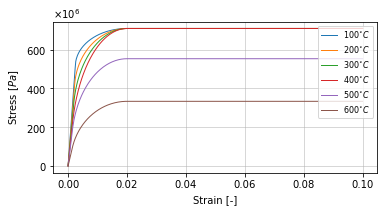

In [11]:
##create figure and set its size
fig = plt.figure(figsize=(6,3)) 


##add a axes (blank area to plot data)
ax = fig.add_subplot(1,1,1) 
plt.subplots_adjust(bottom=0.18,left=0.15)

#Set the name of the axes
#ax.set_title("Name of the plot", fontsize=14)

#Plot data

for temp,i in zip(temperatures,range(len(strain_t))):
    ax.plot(strains,strain_t[i],linewidth=1,label=str(temp)+'$^{\circ}C$')


plt.plot()
#ax.scatter(x,y,label="Put the label here")
ax.legend(loc='upper right',fontsize=8)


ax.grid(b=True,which='major',linewidth=0.5)


#Axis labels
ax.set_xlabel('Strain [-]',fontsize=10,labelpad=5)
ax.set_ylabel("Stress [$Pa$]", fontsize=10,labelpad=5)
ax.ticklabel_format(axis="y",style="sci",scilimits=(6,6),useMathText=True)

#Save fig
#fig.savefig("Steel_strain_stress_temperature.pdf",format='pdf')

## Export to CSV

In [12]:
df = pd.DataFrame(strains,columns=['strain'])

for temp,i in zip(temperatures,range(len(strain_t))):
    df[temp] = pd.Series(strain_t[i])
df.head()

,strain,100,200,300,400,500,600
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000200,4.209860e+07,3.788874e+07,3.367888e+07,2.946902e+07,2.525916e+07,1.305057e+07
2,0.000401,8.419719e+07,7.577747e+07,6.735776e+07,5.893804e+07,5.051832e+07,2.610113e+07
3,0.000601,1.262958e+08,1.136662e+08,1.010366e+08,8.840705e+07,7.577747e+07,3.915170e+07
4,0.000802,1.683944e+08,1.515549e+08,1.347155e+08,1.178761e+08,1.010366e+08,5.220226e+07


# Stress x Strain - Eurocode Annex A - Strain hardening

In [15]:
#Material definitions
fpi=525.18e6
fyi=708.47e6
Eai = 525.18e6/0.0025


emax = 0.1 #Max strain to calculate
points = 500 #number of points to calculate
strains = np.linspace(0,emax,points,endpoint=True)

#Alternativley create a list with desired strains e.g:
#strains = [0,0.0025,0.0226,0.0419,0.0609,0.0798,0.0981,0.1044]

#Temperatures to evaluate
#20 to 1200
temperatures = [100,200,300,400,500,600]

strain_t = []
for temp in temperatures:
    strain_t.append(np.array([stress_hardening(e,temp,fpi,fyi,Eai) for e in strains]))

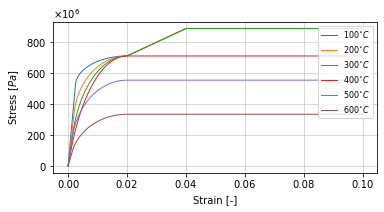

In [16]:
##create figure and set its size
fig = plt.figure(figsize=(6,3)) 


##add a axes (blank area to plot data)
ax = fig.add_subplot(1,1,1) 
plt.subplots_adjust(bottom=0.18,left=0.15)

#Set the name of the axes
#ax.set_title("Name of the plot", fontsize=14)

#Plot data

for temp,i in zip(temperatures,range(len(strain_t))):
    ax.plot(strains,strain_t[i],linewidth=1,label=str(temp)+'$^{\circ}C$')


plt.plot()
#ax.scatter(x,y,label="Put the label here")
ax.legend(loc='upper right',fontsize=8)


ax.grid(b=True,which='major',linewidth=0.5)


#Axis labels
ax.set_xlabel('Strain [-]',fontsize=10,labelpad=5)
ax.set_ylabel("Stress [$Pa$]", fontsize=10,labelpad=5)
ax.ticklabel_format(axis="y",style="sci",scilimits=(6,6),useMathText=True)

#Save fig
#fig.savefig("Steel_strain_stress_temperature.pdf",format='pdf')